# MDI341: TP Graphs

In [1]:
import numpy as np
import random
import networkx as nx
import seaborn as sns
sns.set_style("whitegrid")
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import os.path
import urllib
import tarfile

**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Erdős-Rényi

#### Question 1

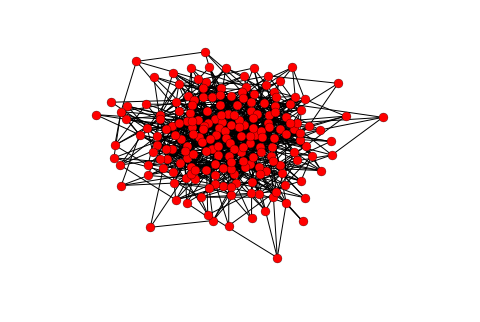

In [2]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n,p)
nx.draw(G_erdos,node_size=80)

#### Question 2

In [3]:
degrees = np.array(list(nx.degree(G_erdos).values()))

print('Number of nodes of the graph : ' + str(len(G_erdos.nodes())))
print('Number of edges of the graph : ' + str(len(G_erdos.edges())))
print('Maximum of degrees of the graph : ' +  str(np.max(degrees)))
print('Minimum of degrees of the graph : ' + str(np.min(degrees)))
print('Median of degrees of the graph : ' + str(np.median(degrees)))
print('Mean of degrees of the graph : ' + str(np.mean(degrees)))

Number of nodes of the graph : 200
Number of edges of the graph : 819
Maximum of degrees of the graph : 17
Minimum of degrees of the graph : 2
Median of degrees of the graph : 8.0
Mean of degrees of the graph : 8.19


#### Question 3

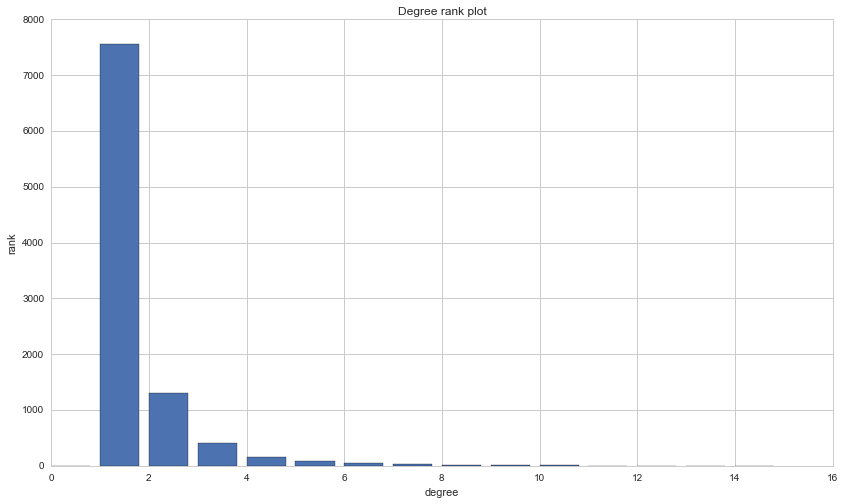

In [45]:
fig = plt.figure(figsize=(14,8))
degrees = np.unique(list(nx.degree(G_erdos).values()))
degrees_hist = nx.degree_histogram(G_erdos)
plt.bar(range(0,len(degrees_hist)),degrees_hist)
plt.title("Degree rank plot")
plt.ylabel("rank")
plt.xlabel("degree")
plt.show()

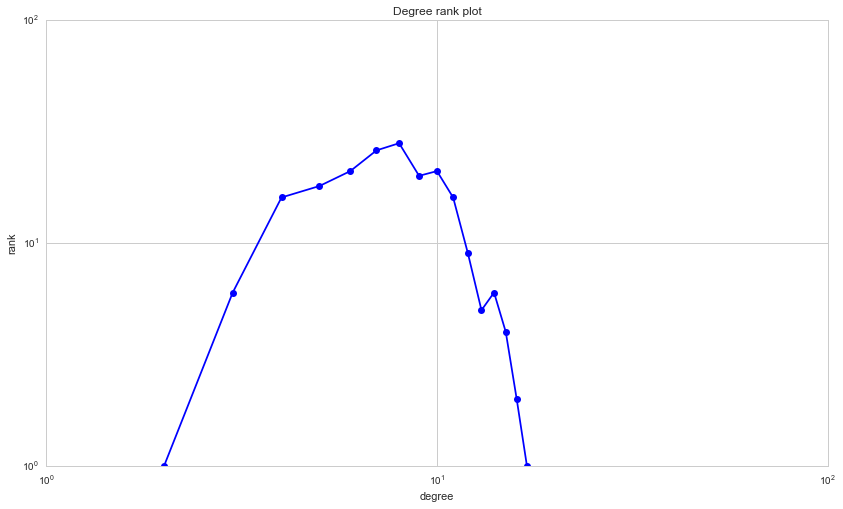

In [5]:
fig = plt.figure(figsize=(14,8))
degrees = np.unique(list(nx.degree(G_erdos).values()))
degrees_hist = nx.degree_histogram(G_erdos)
plt.loglog(range(0,len(degrees_hist)),degrees_hist,'-b',marker='o')
plt.title("Degree rank plot")
plt.ylabel("rank")
plt.xlabel("degree")
plt.show()

Puisque la fonction log_log ne presente pas une droite donc on est pas en power law ce qui confirme les résultat qu'on attend en théorie.

#### Question 4

In [6]:
print('E(CC) = ' + str(np.mean(np.array(list(nx.clustering(G_erdos).values())))))
print('p = ' + str(p))

E(CC) = 0.0483292451013
p = 0.04


La valeur attendue pour un graphe de de type Erdös–Rényi est de E(CC) = p, et dans notre cas, p = 0.04, ce qui correspond à la valeur attendue.

#### Question 5

In [7]:
print('Average of shortest path length : ' + str(nx.average_shortest_path_length(G_erdos)))
print('Diameter of the graph : ' + str(nx.diameter(G_erdos)))

Average of shortest path length : 2.7407035175879395
Diameter of the graph : 5


On remarque bien un effet petit monde.

### Barabási–Albert

#### Question 6

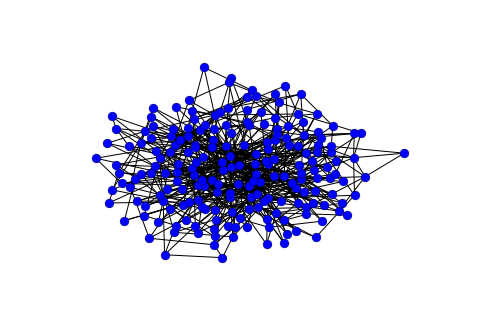

In [8]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n,m)
nx.draw(G_barabasi,node_size=80,node_color='blue')

In [9]:
degrees = np.array(list(nx.degree(G_barabasi).values()))

print('Number of nodes of the graph : ' + str(len(G_barabasi.nodes())))
print('Number of edges of the graph : ' + str(len(G_barabasi.edges())))
print('Maximum of degrees of the graph : ' +  str(np.max(degrees)))
print('Minimum of degrees of the graph : ' + str(np.min(degrees)))
print('Median of degrees of the graph : ' + str(np.median(degrees)))
print('Mean of degrees of the graph : ' + str(np.mean(degrees)))

Number of nodes of the graph : 200
Number of edges of the graph : 591
Maximum of degrees of the graph : 52
Minimum of degrees of the graph : 3
Median of degrees of the graph : 4.0
Mean of degrees of the graph : 5.91


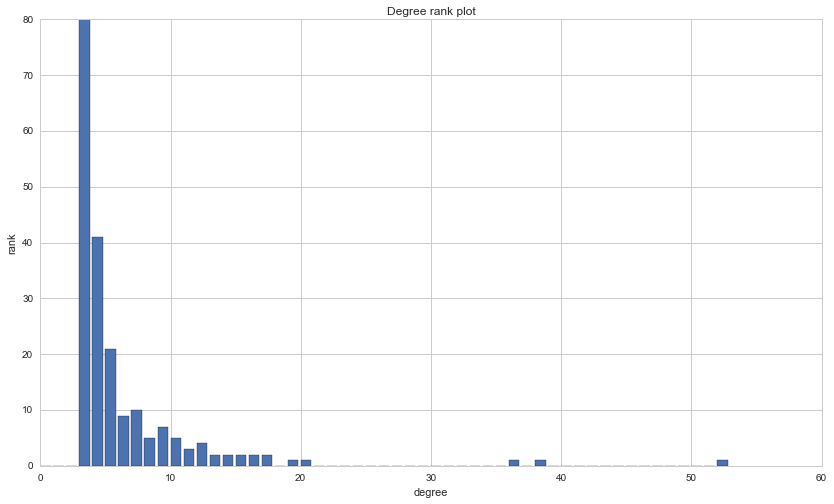

In [10]:
fig = plt.figure(figsize=(14,8))
degrees = np.unique(list(nx.degree(G_barabasi).values()))
degrees_hist = nx.degree_histogram(G_barabasi)
plt.bar(range(0,len(degrees_hist)),degrees_hist)
plt.title("Degree rank plot")
plt.ylabel("rank")
plt.xlabel("degree")
plt.show()

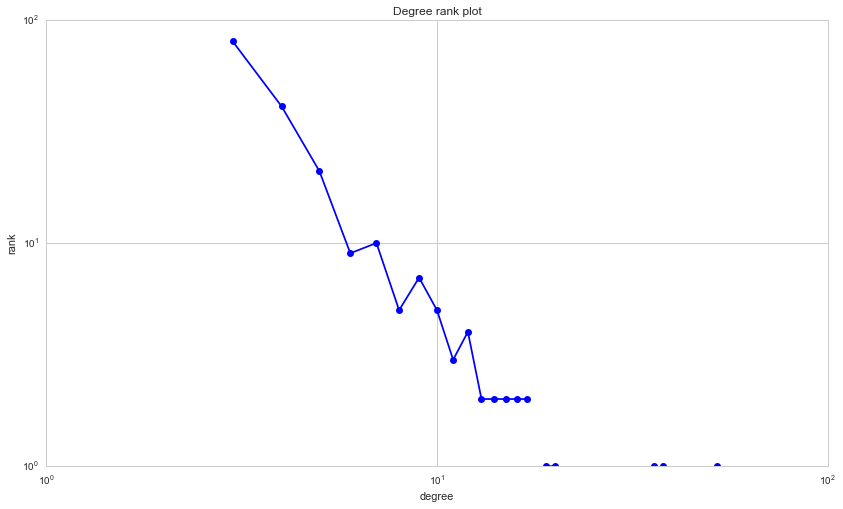

In [11]:
fig = plt.figure(figsize=(14,8))
degrees = np.unique(list(nx.degree(G_barabasi).values()))
degrees_hist = nx.degree_histogram(G_barabasi)
plt.loglog(range(0,len(degrees_hist)),degrees_hist,'-b',marker='o')
plt.title("Degree rank plot")
plt.ylabel("rank")
plt.xlabel("degree")
plt.show()

In [12]:
print('E(CC) = ' + str(np.mean(np.array(list(nx.clustering(G_barabasi).values())))))

E(CC) = 0.0956206617112


In [13]:
print('Average of shortest path length : ' + str(nx.average_shortest_path_length(G_barabasi)))
print('Diameter of the graph : ' + str(nx.diameter(G_barabasi)))

Average of shortest path length : 2.861457286432161
Diameter of the graph : 5


## Graphe Karate Club

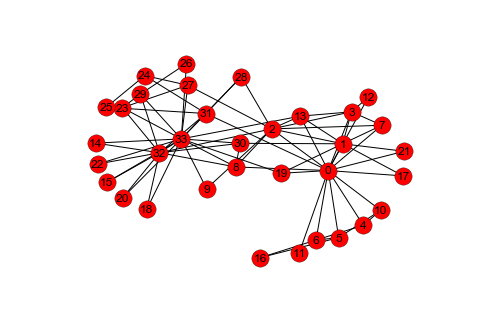

In [14]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

In [15]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs=nx.all_pairs_shortest_path_length(G_karate)
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

Linkage = Complete + Number of cluster : 2


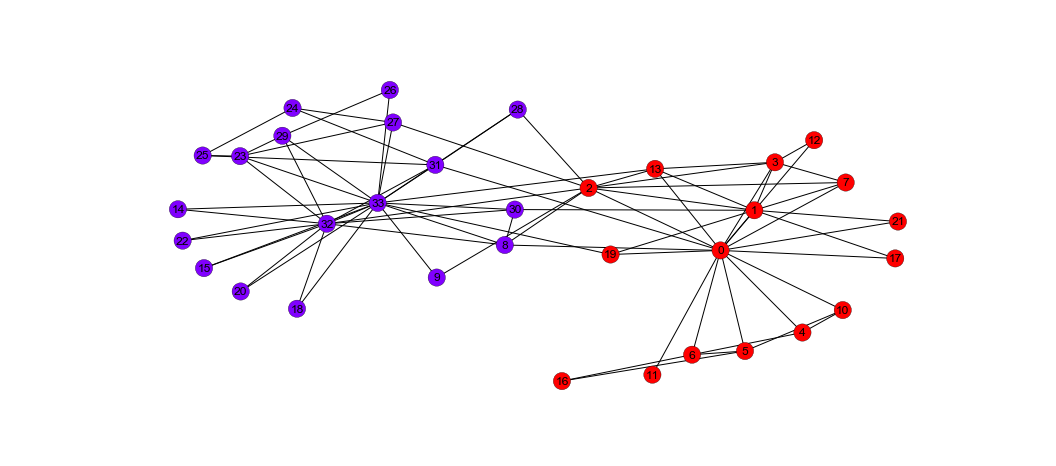

Linkage = Average + Number of cluster : 2


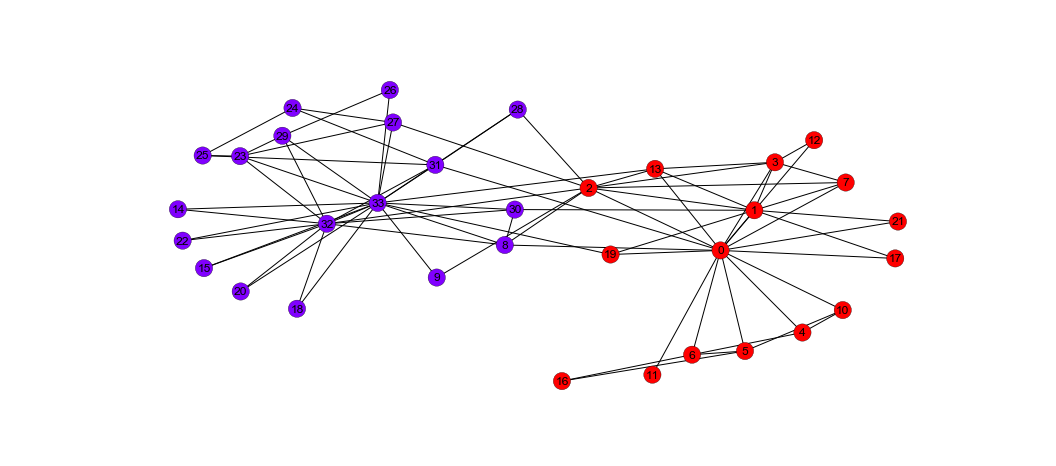

In [16]:
print('Linkage = Complete + Number of cluster : 2')
ag = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='complete')
labels_clusters = ag.fit_predict(distances)
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=labels_clusters,cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
plt.show()

print('Linkage = Average + Number of cluster : 2')
ag = AgglomerativeClustering(n_clusters=2,affinity='precomputed',linkage='average')
labels_clusters = ag.fit_predict(distances)
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=labels_clusters,cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
plt.show()

Linkage = Complete + Number of cluster : 4


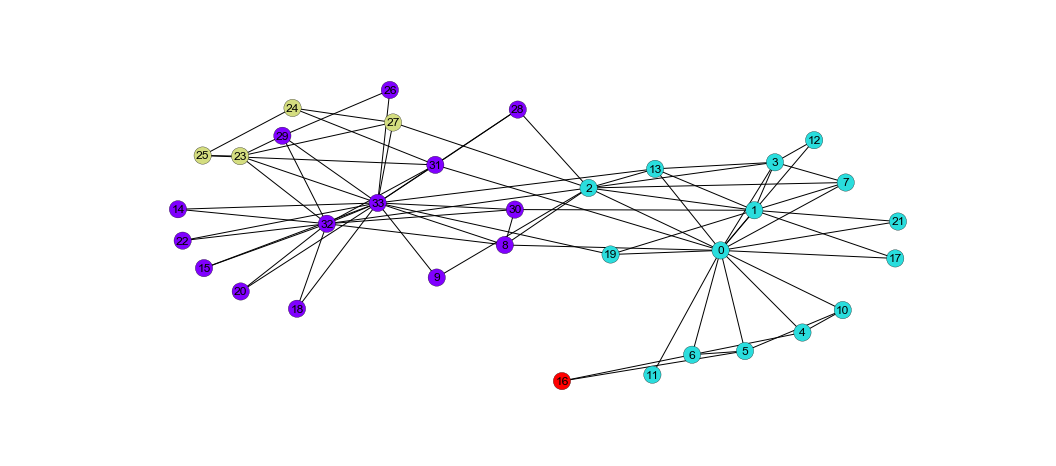

Linkage = Average + Number of cluster : 4


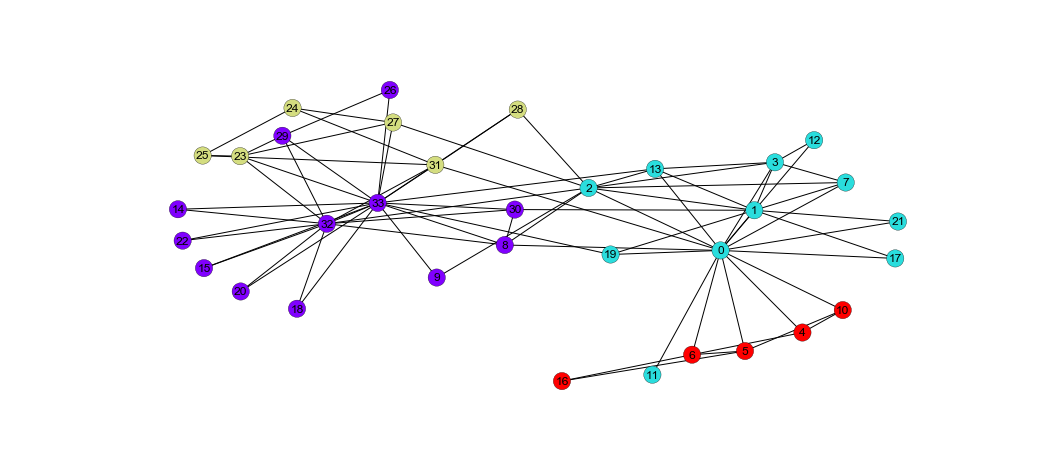

In [17]:
print('Linkage = Complete + Number of cluster : 4')
ag = AgglomerativeClustering(n_clusters=4,affinity='precomputed',linkage='complete')
labels_clusters = ag.fit_predict(distances)
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=labels_clusters,cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
plt.show()

print('Linkage = Average + Number of cluster : 4')
ag = AgglomerativeClustering(n_clusters=4,affinity='precomputed',linkage='average')
labels_clusters = ag.fit_predict(distances)
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=labels_clusters,cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)
plt.show()

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

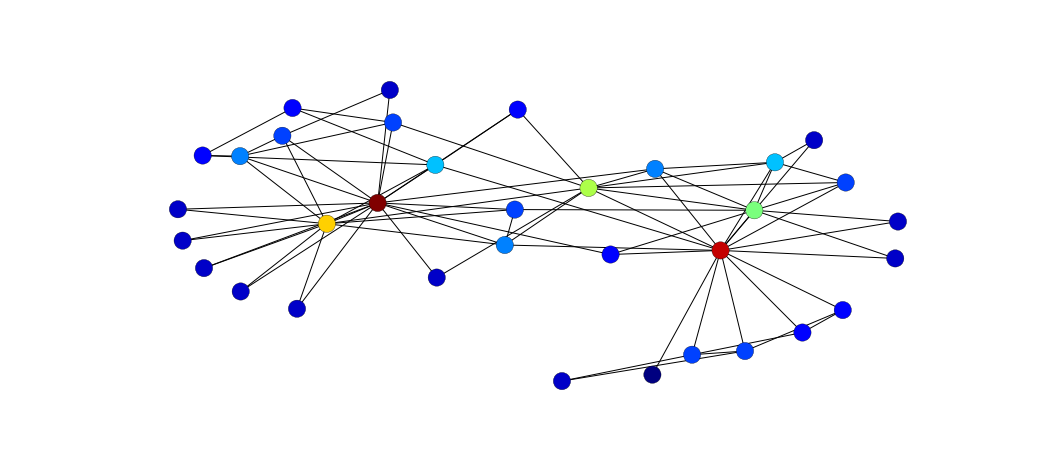

In [18]:
# conseil: utiliser l'option cmap = plt.get_cmap('jet') de nx.draw
# les couleurs iront du bleu foncé (peu central) au rouge foncé (très central)
degree_centrality = list(nx.degree_centrality(G_karate).values())
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=degree_centrality,cmap = plt.get_cmap('jet'), pos=pos)
plt.show()

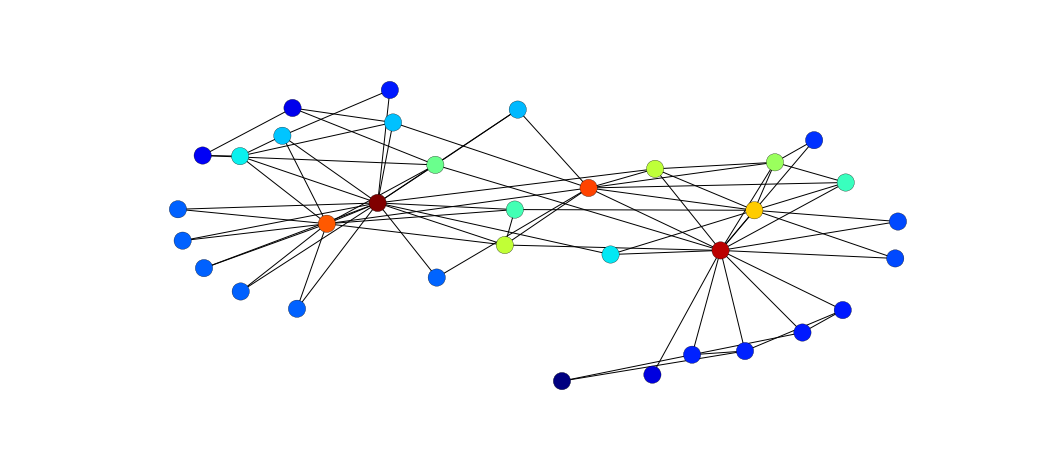

In [19]:
degree_centrality = list(nx.eigenvector_centrality(G_karate).values())
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=degree_centrality,cmap = plt.get_cmap('jet'), pos=pos)
plt.show()

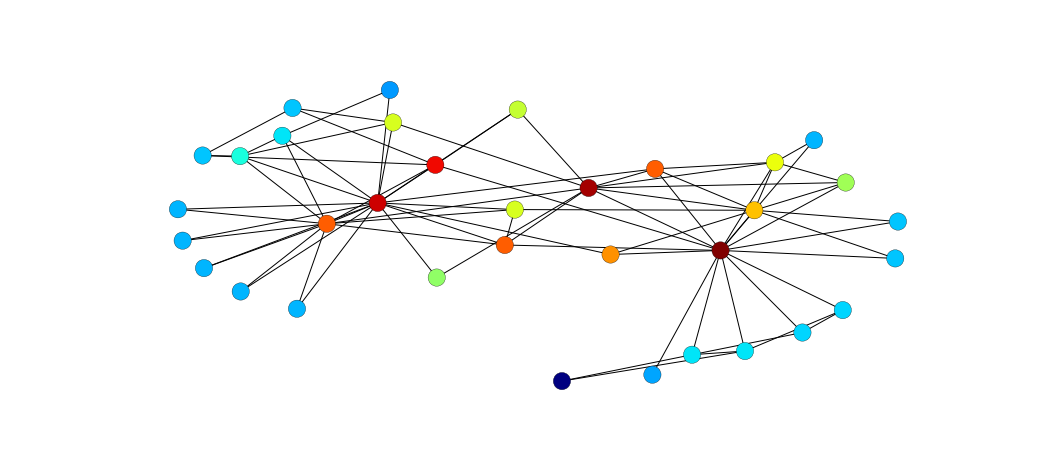

In [20]:
degree_centrality = list(nx.closeness_centrality(G_karate).values())
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=degree_centrality,cmap = plt.get_cmap('jet'), pos=pos)
plt.show()

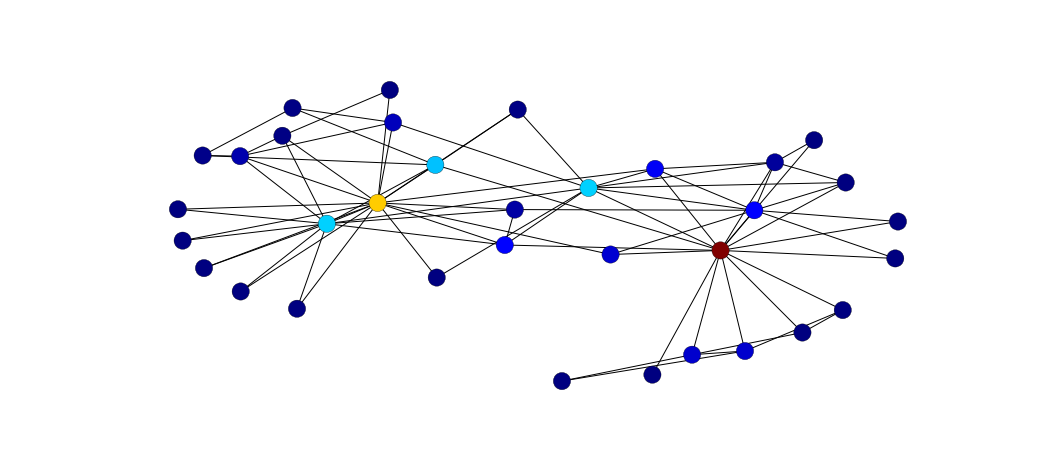

In [21]:
degree_centrality = list(nx.betweenness_centrality(G_karate).values())
fig = plt.figure(figsize=(14,6))
nx.draw(G_karate,node_color=degree_centrality,cmap = plt.get_cmap('jet'), pos=pos)
plt.show()

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

In [22]:
import urllib.request
if os.path.exists('amazon.txt.gz') is False:
    resp = urllib.request.urlretrieve('https://snap.stanford.edu/data/bigdata/' +
                              'communities/com-amazon.ungraph.txt.gz', 'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt.gz')

## Prédiction dans les graphes

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


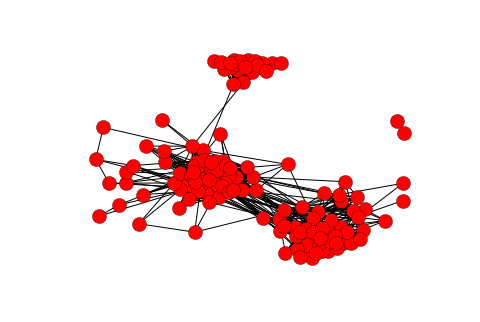

In [23]:
if os.path.exists('facebook.tar.gz') is False:
    resp = urllib.request.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
                              'facebook.tar.gz')
    tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, node_size=200, pos=pos)
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

In [24]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

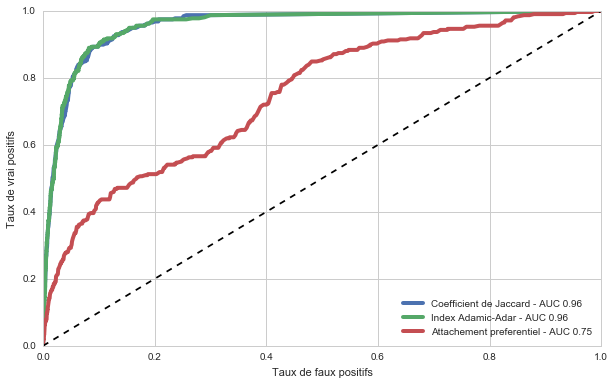

In [46]:
# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

fpr_jaccard, tpr_jaccard, thresholds = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = metrics.auc(fpr_jaccard, tpr_jaccard)

pred_adamic = list(nx.adamic_adar_index(G_fb_train))
score_adamic, label_adamic = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic])

fpr_adamic, tpr_adamic, thresholds = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = metrics.auc(fpr_adamic, tpr_adamic)

pred_pref = list(nx.preferential_attachment(G_fb_train))
score_pref, label_pref = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref])

fpr_pref, tpr_pref, thresholds = metrics.roc_curve(label_pref, score_pref)
auc_pref = metrics.auc(fpr_pref, tpr_pref)

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot(fpr_adamic, tpr_adamic, label='Index Adamic-Adar - AUC %.2f' % auc_adamic, linewidth=4)
plt.plot(fpr_pref, tpr_pref, label='Attachement preferentiel - AUC %.2f' % auc_pref, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

#### Question 11

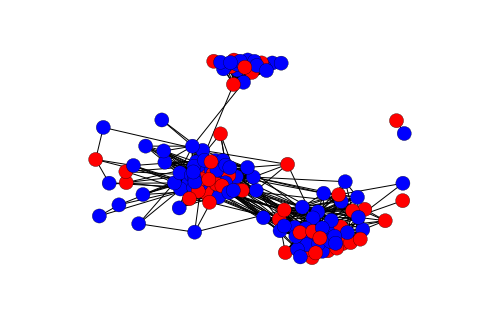

In [28]:
# on charge les labels des noeuds et on les affiche
with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = np.array(list(map(int, line.split()[1:])))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), node_color = labels, node_size=200, pos=pos)
plt.show()

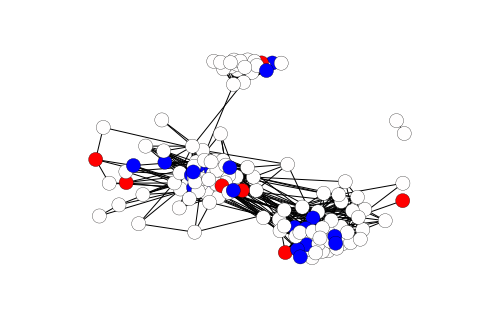

In [29]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), node_color = known_labels, node_size=200, pos=pos)

On va maintenant appliquer la propagation de label et voir les résultats

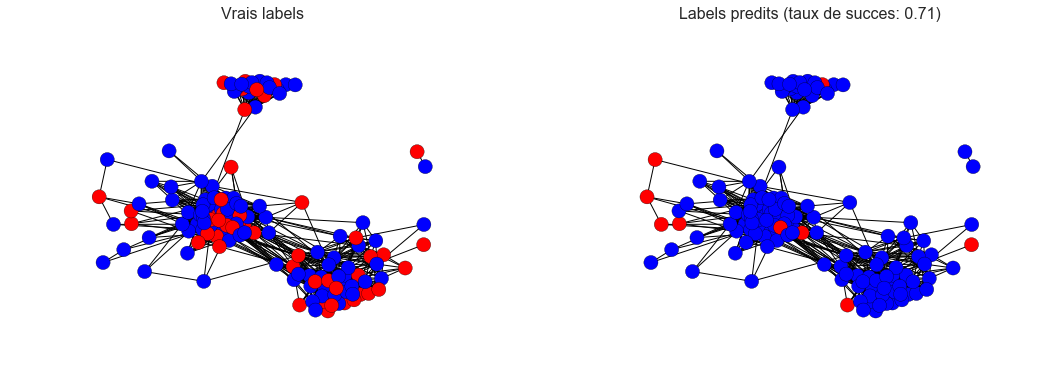

In [30]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

# propagation de labels à faire ici

I = np.eye(n)

# labels prédits à mettre dans F_pred pour affichage ci-dessous
F_pred = np.argmax(np.dot(np.linalg.inv((1-alpha)*I + L_sym),Y),axis=1)
F_pred = np.array(np.array(F_pred).reshape(-1,).tolist())
F_pred[F_pred == 0] = -1
from sklearn.metrics import accuracy_score
pred = accuracy_score(labels, F_pred)

plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), node_color = F_pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f)' % pred, size=16)

### Fin